# Disease Propagation in a Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A graph of 2 nodes:
0:[1]
1:[0]

Nodes: [0, 1]
Edges: [(0, 1)]


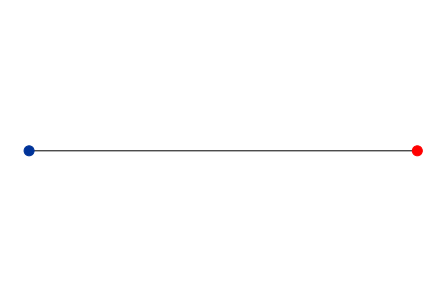

In [10]:
class Graph():
    def __init__(self):
        self.gdict = {}
        self.values = {}
        
    def add_node(self, node, val=0):
        """If node is not in a dictionary, add it."""
        if node not in self.gdict:
            self.gdict[node] = []
        self.values[node] = val
    
    def add_edge(self, node1, node2):        
        self.add_node(node1)
        self.add_node(node2)
        # Add node2 as a connection for node1, and the other way around
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def get_nodes(self):
        """Returns a list of nodes."""
        return list(self.gdict.keys())
    
    def get_edges(self):
        """Returns a list of edges."""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        RED = (1,0,0)
        BLUE = (0,0.2,0.6)
        
        g_nx = nx.Graph()
        nodes = self.get_nodes()
        g_nx.add_nodes_from(nodes)
        g_nx.add_edges_from(self.get_edges())
        colors = []
        for i in range(len(nodes)):
            if self.values[nodes[i]]==0:
                colors.append(BLUE)
            else:
                colors.append(RED)
        nx.draw_kamada_kawai(g_nx, node_size=100, node_color=colors)
    
# Test
g = Graph()
g.add_edge(0,1)
print(g)
print('Nodes:',g.get_nodes())
print('Edges:',g.get_edges())
g.values[0] = 1
g.plot()

In [11]:
def degrees(g):
    """Calculates and plots the degrees distribution for a graph."""
    degrees = []
    for node,links in g.gdict.items():
        degrees.append(len(links))

    #print(degrees)
    hist = np.zeros(max(degrees)+1)
    for degree in degrees:
        hist[degree] += 1
    #print(hist)

    plt.plot(hist,'.-');
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    
    return hist

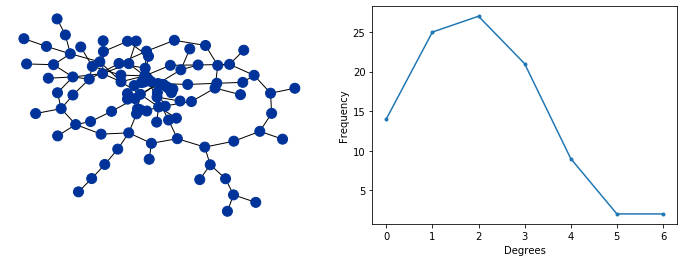

In [12]:
"""Let's screate a random network."""
def random_network(n_nodes=7):
    n_edges = n_nodes

    g = Graph()
    for i in range(n_nodes):
        g.add_node(i)
    edges = []
    while len(edges)<n_edges:
        n1 = np.random.randint(low=0, high=n_nodes)
        n2 = np.random.randint(low=0, high=n_nodes)
        if n2<n1:
            n1,n2 = n2,n1

        if (n1,n2) not in edges and n1!=n2:
            g.add_edge(n1,n2)
            edges.append((n1,n2))
    return g
    
#print(g)

g = random_network(100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
degrees_random = degrees(g)

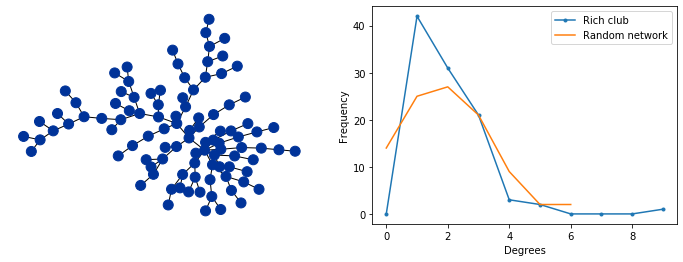

In [13]:
#Alternative network creator, correct version of homework from Online Class 2
def rich_club_network(n_nodes=7):
    g = Graph()
    for i in range(n_nodes):
        if i==0:
            g.add_node(0)
        else:
            g.add_edge(i, np.random.randint(low=0, high=i))
    return g

g = rich_club_network(100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
degrees(g)
plt.plot(degrees_random);
plt.legend(['Rich club','Random network']);

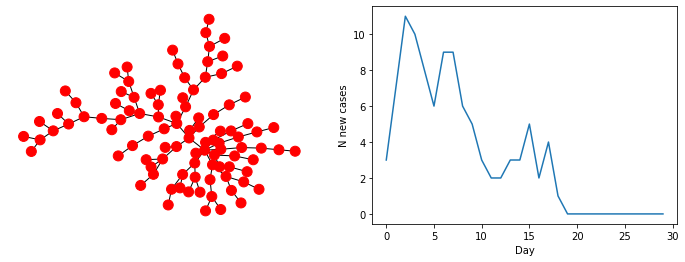

In [14]:
def pandemic(g, prob=0.5, nsteps=10):
    """Runs the pandemic for several steps."""
    for node in g.get_nodes():
        g.values[node] = 0      #First all nodes will be healthy 
    g.values[0] = 1             #Only node 0 is sick

    history = np.zeros(nsteps)
    for t in range(nsteps):
        newly_infected = []
        for node in g.get_nodes():
            if g.values[node]==1:
                neighbors = g.gdict[node]
                for neighbor in neighbors:
                    if g.values[neighbor]==0 and np.random.uniform()<prob:
                        newly_infected.append(neighbor)
        for node in newly_infected:
            g.values[node] = 1
        history[t] = len(newly_infected)
    return history

history = pandemic(g, prob=0.5, nsteps=30)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Day');
plt.ylabel('N new cases');

# Homework

* When we run pandemic, do not always have node 0 infected, rather pick patient 0 at random, from all nodes that are present in the network 
* Make a guess (for yourself), which of the two types of networks we have created so far is more prone to a pandemic
* Compare network configurations of the two, run the pandemic in both of them, compare the plots of new cases (keep all parameters the same for now) 
* Add loop and averaging to run several experiments for both network types. For each type, general N different networks and run pandemics in all of them. Then remember the curves, average them, and plot the averages 

In [7]:
import statistics

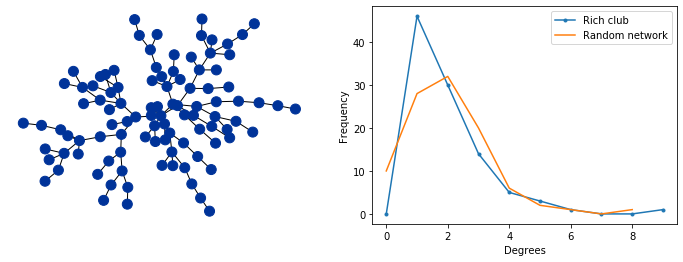

In [51]:
#Network 1
def rich_club_network(n_nodes=9):
    g = Graph()
    for i in range(n_nodes):
        if i==0:
            g.add_node(0)
        else:
            g.add_edge(i, np.random.randint(low=0, high=i))
    return g

g = rich_club_network(100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
degrees(g)
plt.plot(degrees_random);
plt.legend(['Rich club','Random network']);


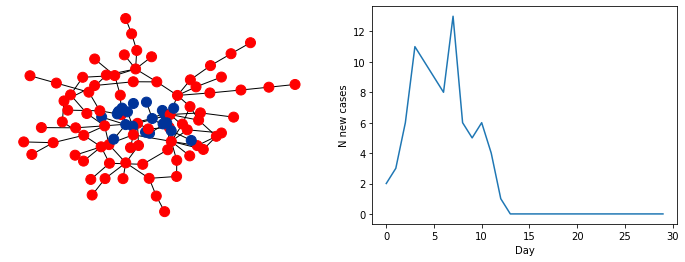

In [47]:
#Network 2
def pandemic(g, prob=0.5, nsteps=10):
    """Runs the pandemic for several steps."""
    for node in g.get_nodes():
        g.values[node] = 0      #First all nodes will be healthy 
    g.values[np.random.randint(low = 0, high = len(g.values))] = 1 #Random node is sick        
    
    history = np.zeros(nsteps)
    for t in range(nsteps):
        newly_infected = []
        for node in g.get_nodes():
            if g.values[node]==1:
                neighbors = g.gdict[node]
                for neighbor in neighbors:
                    if g.values[neighbor]==0 and np.random.uniform()<prob:
                        newly_infected.append(neighbor)
        for node in newly_infected:
            g.values[node] = 1
        history[t] = len(newly_infected)
    return history

#New graph for new model with random patient 0 node
history = pandemic(g, prob=0.5, nsteps=30)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Day');
plt.ylabel('N new cases');


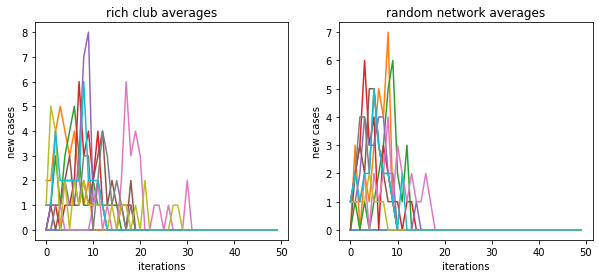

In [99]:
#Averaging networks, determining which is more likely to be susceptible to a pandemic

nsteps = 50 #This model has 50 iterations
ntrials = 10

rich_club_avg = np.zeros(shape = (nsteps,ntrials)) #Creating an array for average values rich club network model
random_network_avg = np.zeros(shape = (nsteps,ntrials)) #Creating an array for average values for random network model

#Defining the figure
plt.figure(figsize = (10,4))

for i in range(1, ntrials):
    rich_club_history = pandemic(rich_club_network(30), prob=0.5, nsteps=50)
    rich_club_avg[:,i] = (rich_club_history)
    random_network_history = pandemic(random_network(30), prob=0.5, nsteps=50)
    random_network_avg[:,i] = (random_network_history)

#Graphs for each subplot of averages
plt.subplot(121)
plt.plot(rich_club_avg)
plt.title('rich club averages')
plt.xlabel('iterations');
plt.ylabel('new cases');
    
plt.subplot(122)
plt.plot(random_network_avg);
plt.title("random network averages")
plt.xlabel('iterations');
plt.ylabel('new cases');

# Write-Up

In this model I created 50 iterations, I chose to do this to get a more long-term view of how the pandemic would play out in both models. 

* In this model with 50 runs, I noticed that in the random network averages, it seems that the pandemic infects everyone very quickly. In this model, there is no slowing down the pandemic, and it seems to have run its course in about 20 iterations. 
* In the rich club network model, there seems to be more of a tendency to "flatten the curve." While the pandemic quickly seems to infect a large population of nodes, it has not completely run its course in the model until about iteration 30.

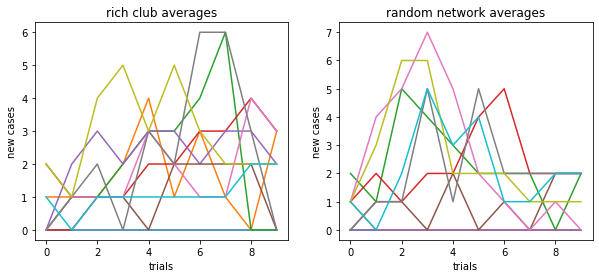

In [82]:
#Averaging networks, determining which is more likely to be susceptible to a pandemic

nsteps = 10 #This model has 10 iterations
ntrials = 10

rich_club_avg = np.zeros(shape = (nsteps,ntrials)) #Creating an array for average values rich club network model
random_network_avg = np.zeros(shape = (nsteps,ntrials)) #Creating an array for average values for random network model

#Defining the figure
plt.figure(figsize = (10,4))

for i in range(1, ntrials):
    rich_club_history = pandemic(rich_club_network(30), prob=0.5, nsteps=10)
    rich_club_avg[:,i] = (rich_club_history)
    random_network_history = pandemic(random_network(30), prob=0.5, nsteps=10)
    random_network_avg[:,i] = (random_network_history)

#Graphs for each subplot of averages
plt.subplot(121)
plt.plot(rich_club_avg)
plt.title('rich club averages')
plt.xlabel('iterations');
plt.ylabel('new cases');
    
plt.subplot(122)
plt.plot(random_network_avg);
plt.title("random network averages")
plt.xlabel('iterations');
plt.ylabel('new cases');

# Write-Up

In this model, I created 10 iterations to see if we could draw any new data from it. 

* In this model, 10 does not seem like enough iterations to accurately understand how the pandemic plays out in each model. However, we can see breifly in the rich club network that it does look a bit flatter than the random network averages network; foreshadowing what we see at 50 iterations. 

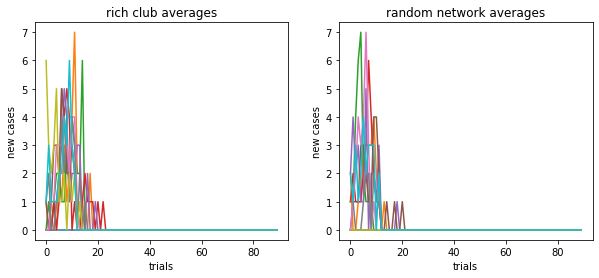

In [83]:
#Averaging networks, determining which is more likely to be susceptible to a pandemic

nsteps = 90 #This model has 90 iterations
ntrials = 10

rich_club_avg = np.zeros(shape = (nsteps,ntrials)) #Creating an array for average values rich club network model
random_network_avg = np.zeros(shape = (nsteps,ntrials)) #Creating an array for average values for random network model

#Defining the figure
plt.figure(figsize = (10,4))

for i in range(1, ntrials):
    rich_club_history = pandemic(rich_club_network(30), prob=0.5, nsteps=90)
    rich_club_avg[:,i] = (rich_club_history)
    random_network_history = pandemic(random_network(30), prob=0.5, nsteps=90)
    random_network_avg[:,i] = (random_network_history)

#Graphs for each subplot of averages
plt.subplot(121)
plt.plot(rich_club_avg)
plt.title('rich club averages')
plt.xlabel('iterations');
plt.ylabel('new cases');
    
plt.subplot(122)
plt.plot(random_network_avg);
plt.title("random network averages")
plt.xlabel('iterations');
plt.ylabel('new cases');

# Write-Up

In this model, I created 90 iterations to see if this theory held true. 

* While this is an exaggerated model, and we cannot really tell anything new, it does seem again as though the rich club network is displaying characteristics of "flattening the curve" while the in random network model, the pandemic runs its course much more quickly. 